In [30]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gzip
with gzip.open("GameAnalyticsTestData.gz") as f:
    df = pd.read_csv(f)
df.head()

,event_timestamp,event_category,event_id,player_country_code,player_id,player_session_id,transaction_amount,game_build,player_first_install_timestamp,session_start_ts,session_duration_seconds,player_cumulative_revenue
0,1484053435,design,boot,TR,7a98917fd12ba24ae4d2e42a74b0944c,01l7esFo-5XvS-eyKl-QX5q-UalaTmyM2qz,nan,v1.1.26,1483818916,1484053428,310,nan
1,1484416837,design,boot,IT,20fbf618e34215d876965b6304134ce3,03PPdJ8G-Hn6V-5zwl-xRZx-3k06wnFhxqH,nan,v1.1.26,1484416849,1484416835,14,nan
2,1484148932,design,boot,NaN,c44c05baf6f019241780cca1947e8cc2,03qZsL5V-m8MH-ybBT-PX6w-K83AOfIWnek,nan,v1.1.28,1482771340,1484148925,8783,nan
3,1483688749,design,boot,AU,f3c00d6b906806ed9c72ec9d64f5b588,06M0sv0U-05L2-PmtM-UH2M-EiWuzuKM8s0,nan,v1.1.26,1483354323,1483688742,247,396.00
4,1484148728,design,boot,IN,3cb0e101b67cfcba4fe42b6342e4d3e5,07PnSNdP-pH1B-JD5T-6esH-AjEDbsHNyuZ,nan,v1.1.26,1482500265,1484148720,178,nan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850009 entries, 0 to 850008
Data columns (total 12 columns):
event_timestamp                   850009 non-null int64
event_category                    850009 non-null object
event_id                          850009 non-null object
player_country_code               818574 non-null object
player_id                         850009 non-null object
player_session_id                 850009 non-null object
transaction_amount                22089 non-null float64
game_build                        850009 non-null object
player_first_install_timestamp    850009 non-null int64
session_start_ts                  850009 non-null int64
session_duration_seconds          850009 non-null int64
player_cumulative_revenue         59998 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 77.8+ MB


In [4]:
df["event_timestamp"] = pd.to_datetime(df["event_timestamp"],unit='s')
df["event_date"] = pd.to_datetime(df["event_timestamp"],unit='s').apply(lambda x: x.date())
df["player_first_install_timestamp"] = pd.to_datetime(df["player_first_install_timestamp"],unit='s')
df["session_start_ts"] = pd.to_datetime(df["session_start_ts"],unit='s')
df.head(3)

,event_timestamp,event_category,event_id,player_country_code,player_id,player_session_id,transaction_amount,game_build,player_first_install_timestamp,session_start_ts,session_duration_seconds,player_cumulative_revenue,event_date
0,2017-01-10 13:03:55,design,boot,TR,7a98917fd12ba24ae4d2e42a74b0944c,01l7esFo-5XvS-eyKl-QX5q-UalaTmyM2qz,nan,v1.1.26,2017-01-07 19:55:16,2017-01-10 13:03:48,310,nan,2017-01-10
1,2017-01-14 18:00:37,design,boot,IT,20fbf618e34215d876965b6304134ce3,03PPdJ8G-Hn6V-5zwl-xRZx-3k06wnFhxqH,nan,v1.1.26,2017-01-14 18:00:49,2017-01-14 18:00:35,14,nan,2017-01-14
2,2017-01-11 15:35:32,design,boot,NaN,c44c05baf6f019241780cca1947e8cc2,03qZsL5V-m8MH-ybBT-PX6w-K83AOfIWnek,nan,v1.1.28,2016-12-26 16:55:40,2017-01-11 15:35:25,8783,nan,2017-01-11


In [5]:
df.describe()
#session_duration_seconds field's maximum is 2,29M. It is an extreme value (outlier)

,transaction_amount,session_duration_seconds,player_cumulative_revenue
count,"22,089.00","850,009.00","59,998.00"
mean,"7,182.01","5,324.39","117,581.74"
std,"3,685.55","48,761.50","316,410.15"
min,99.00,0.00,99.00
25%,"3,699.00",127.00,595.00
50%,"9,999.00",301.00,"3,694.00"
75%,"9,999.00",886.00,"89,991.00"
max,"9,999.00","2,295,068.00","7,247,265.00"


In [6]:
#Detect and exclude outliers-V2
#Boolean indexing
df=df[~(np.abs(df["session_duration_seconds"]-df["session_duration_seconds"].mean()) > (3*df["session_duration_seconds"].std()))]
df=df[~(np.abs(df["player_cumulative_revenue"]-df["player_cumulative_revenue"].mean()) > (3*df["player_cumulative_revenue"].std()))]
df.describe()

,transaction_amount,session_duration_seconds,player_cumulative_revenue
count,"20,794.00","843,819.00","58,264.00"
mean,"7,196.43","2,543.49","79,023.53"
std,"3,710.59","10,313.06","162,161.20"
min,99.00,0.00,99.00
25%,"3,699.00",127.00,499.00
50%,"9,999.00",295.00,"3,496.00"
75%,"9,999.00",863.00,"79,992.00"
max,"9,999.00","151,608.00","1,041,580.00"


In [27]:
#data handling: event_id has different letter style 
df['event_id']=df['event_id'].str.lower()
df['event_id'].value_counts()

boot                                 823025
monetize:buy:buycandy6                 7508
monetize:buy:buycash6                  5449
monetize:buy:buybundlehighroller       3965
monetize:buy:buybundlemotormayhem       826
monetize:buy:buybundle1                 779
monetize:buy:buycandy1                  680
monetize:buy:buycash1                   388
monetize:buy:buycandy2                  367
monetize:buy:buycandy3                  232
monetize:buy:buycash2                   113
monetize:buy:buycandy5                  105
monetize:buy:buycash5                   100
monetize:buy:buycash3                    95
monetize:buy:buycandy4                   95
monetize:buy:buycash4                    92
Name: event_id, dtype: int64

In [8]:
#Number of unique users: How many players have been seen playing the game?
print("Number of Unique User: %d" % df['player_id'].nunique())

Number of Unique User: 92473


In [9]:
#How many unique sessions are there per day?
df4=df.groupby("event_date")[['player_session_id']].nunique()
print(df4)

            player_session_id
event_date                   
2017-01-05              61349
2017-01-06              66647
2017-01-07              72355
2017-01-08              83392
2017-01-09              80832
2017-01-10              79993
2017-01-11              86974
2017-01-12              86344
2017-01-13              80721
2017-01-14              84426


In [10]:
#Is the count of unique sessions per user constant during the week?
df5=df.groupby("event_date").player_session_id.nunique()/df.groupby("event_date").player_id.nunique()
print(df5)

event_date
2017-01-05   2.89
2017-01-06   3.20
2017-01-07   3.33
2017-01-08   3.42
2017-01-09   3.47
2017-01-10   3.47
2017-01-11   3.41
2017-01-12   3.53
2017-01-13   3.58
2017-01-14   3.44
dtype: float64


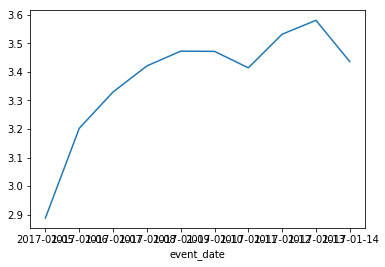

In [11]:
df5.plot(kind='line')

In [12]:
#Is there a day of the week in which we receive more events?
df['day_of_week'] = df['event_timestamp'].dt.day_name()
df.groupby('day_of_week').agg({'event_id':'count'}).sort_values(by='event_id', ascending=False)
#Saturday is the most events receieved.

,event_id
day_of_week,
Saturday,168620
Thursday,158879
Friday,158162
Wednesday,94204
Sunday,90877
Monday,87199
Tuesday,85878


In [28]:
#What is the item that produced the largest revenue per day?

df1=df.groupby(['event_date','event_id'], as_index=False)[['transaction_amount']].sum().sort_values("transaction_amount",ascending=False).head(14)
df2=df1.sort_values("event_date").drop_duplicates(subset='event_date', keep='first', inplace=False)
print(df2)

     event_date                event_id  transaction_amount
9    2017-01-05  monetize:buy:buycandy6        6,929,307.00
25   2017-01-06  monetize:buy:buycandy6        5,599,440.00
41   2017-01-07  monetize:buy:buycandy6        7,119,288.00
57   2017-01-08  monetize:buy:buycandy6        9,429,057.00
73   2017-01-09  monetize:buy:buycandy6        7,049,295.00
89   2017-01-10  monetize:buy:buycandy6        7,659,234.00
105  2017-01-11  monetize:buy:buycandy6        8,959,104.00
121  2017-01-12  monetize:buy:buycandy6        7,409,259.00
137  2017-01-13  monetize:buy:buycandy6        6,389,361.00
153  2017-01-14  monetize:buy:buycandy6        8,529,147.00


In [29]:
#What are the 5 most profitable items of this game
df3=df.groupby(['event_id'])[['transaction_amount']].sum().sort_values("transaction_amount",ascending=False).head(5)
print(df3)

                                   transaction_amount
event_id                                             
monetize:buy:buycandy6                  75,072,492.00
monetize:buy:buycash6                   54,484,551.00
monetize:buy:buybundlehighroller        14,666,535.00
monetize:buy:buybundlemotormayhem        2,064,174.00
monetize:buy:buybundle1                  1,245,621.00


In [15]:
#Detect and exclude outliers-V1
#Boolean indexing: keep only the ones that are within +3 to -3 standard deviations in the column 'session_duration_seconds'
#df=df[np.abs(df["session_duration_seconds"]-df["session_duration_seconds"].mean()) <= (3*df["session_duration_seconds"].std())]
#df=df[np.abs(df["player_cumulative_revenue"]-df["player_cumulative_revenue"].mean()) <= (3*df["player_cumulative_revenue"].std())]
#df.describe()

In [16]:
#Detect and exclude outliers-V3
#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#df.describe()

In [17]:
#regions = pd.read_html("https://s3.amazonaws.com/ga-scratchpad/GAME-4183/data/regions.csv")
#regions.head(3)

In [18]:
#Number of unique users by countries
df.groupby('player_country_code')['player_session_id'].nunique().sort_values(ascending=False).head(5)

player_country_code
US    176924
FR    101828
PL     69390
GB     46561
CA     41704
Name: player_session_id, dtype: int64

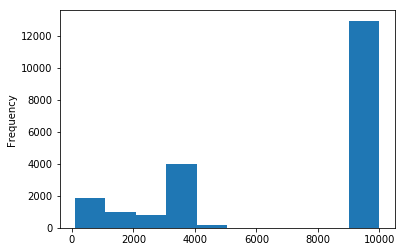

In [19]:
df["transaction_amount"].plot(kind='hist')

In [20]:
df["transaction_amount"].value_counts()


9,999.00    12957
3,699.00     3965
2,499.00      826
1,599.00      779
99.00         680
499.00        480
199.00        388
999.00        327
4,999.00      205
1,998.00      187
Name: transaction_amount, dtype: int64

In [21]:
#df['weekday'] = df['event_timestamp'].dt.dayofweek
#df['day_of_week'] = df['event_timestamp'].dt.day_name()
#df.head()